In [21]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

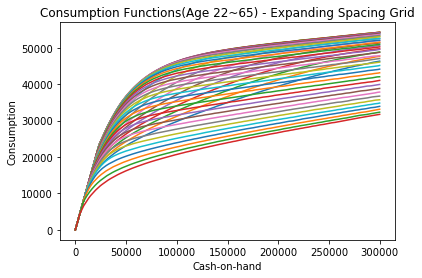

In [123]:
base_path = '/Users/Quintus/Google Drive/Dynamic Programming/code'
c_func_fp = os.path.join(base_path, 'results', 'Loop on term and rho, gamma=4-8, denser=1501_3001, expw, evenlyc', 'c function_10_0.74_4.xlsx')
c_df = pd.read_excel(c_func_fp)

end = 15000000 / 50
grid_w = np.arange(1, end, 100)
for age in range(22, 66):
    spline = CubicSpline(c_df[str(100)], c_df[str(age)], bc_type='natural')
    c = spline(grid_w)
    plt.plot(grid_w, c, label=str(age))
plt.xlabel('Cash-on-hand')
plt.ylabel('Consumption')
plt.title('Consumption Functions(Age 22~65) - Expanding Spacing Grid')
# plt.legend()
plt.show()

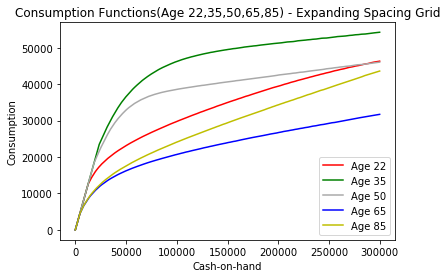

In [124]:
grid_w = np.arange(1, end, 100)

spline = CubicSpline(c_df[str(100)], c_df['22'], bc_type='natural')
c = spline(grid_w)
plt.plot(grid_w, c, color='r', label='Age 22')

spline = CubicSpline(c_df[str(100)], c_df['35'], bc_type='natural')
c = spline(grid_w)
plt.plot(grid_w, c, color='g', label='Age 35')

spline = CubicSpline(c_df[str(100)], c_df['50'], bc_type='natural')
c = spline(grid_w)
plt.plot(grid_w, c, color='darkgrey', label='Age 50')

spline = CubicSpline(c_df[str(100)], c_df['65'], bc_type='natural')
c = spline(grid_w)
plt.plot(grid_w, c, color='b', label='Age 65')

spline = CubicSpline(c_df[str(100)], c_df['85'], bc_type='natural')
c = spline(grid_w)
plt.plot(grid_w, c, color='y', label='Age 85')

plt.xlabel('Cash-on-hand')
plt.ylabel('Consumption')
plt.title('Consumption Functions(Age 22,35,50,65,85) - Expanding Spacing Grid')
plt.legend()
plt.show()

### Plotting the Utility Function

In [4]:
def utility(c, gamma):
    return c**(1-gamma) / (1-gamma)

gamma = 4
c = np.arange(1, 100).astype('float')

u = utility(c, gamma)

plt.plot(c, u)
plt.show()

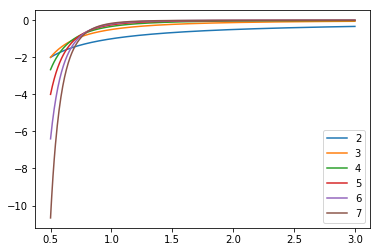

In [17]:
gamma_list = np.arange(2, 8, 1)
c = np.linspace(0.5, 3, 500).astype('float')

for gamma in gamma_list:
    u = utility(c, gamma)
    plt.plot(c, u)
plt.legend(gamma_list)
plt.show()

###  Curvature of Utility Funcs - measure where the curvature disappear as c increases

In [95]:

gamma_list = np.arange(2, 8, 0.5)
c = np.linspace(0.1, 300, 500).astype('float')
precision = 10**(-5)

In [96]:
curv = np.zeros((2, len(gamma_list)))
curv[0, :] = gamma_list

for i, gamma in np.ndenumerate(gamma_list):
    u = utility(c, gamma)
    u_diff = np.diff(u)
    curv[1, i] = np.argmax(u_diff < precision)
print(curv)

[[  2.    2.5   3.    3.5   4.    4.5   5.    5.5   6.    6.5   7.    7.5]
 [408.  136.   65.   38.   26.   19.   15.   12.   10.    9.    8.    7. ]]


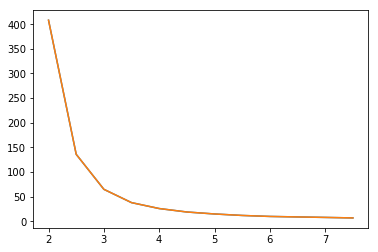

In [99]:
plt.plot(curv[0, :], curv[1, :])
plt.show()

### Interpolation on Utility Function

In [15]:
EXPAND_FAC = 5
even_grid = np.linspace(0, 1, 501)
grid = 1 + (15000001 - 1) * even_grid**EXPAND_FAC

In [21]:
x = np.arange(1, 15000001, 10)
spline = CubicSpline(grid, utility(grid, 4), bc_type='natural')
y = spline(x)

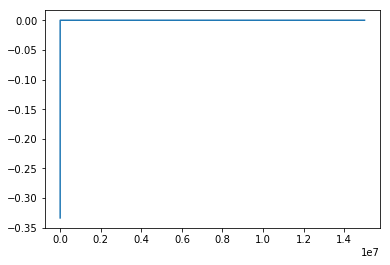

In [22]:
plt.plot(x, y)
plt.show()

### Value Functions

In [22]:
N_W = 501
LOWER_BOUND_W = 1
UPPER_BOUND_W = 15000000
EXPAND_FAC = 4

In [23]:
even_grid = np.linspace(0, 1, N_W)
grid_w = LOWER_BOUND_W + (UPPER_BOUND_W - LOWER_BOUND_W) * even_grid**EXPAND_FAC

base_path = '/Users/Quintus/Google Drive/Dynamic Programming/code'
v_func_fp = os.path.join(base_path, 'results', 'v function_15_0.82_4.xlsx')
v_df = pd.read_excel(v_func_fp)

end = 100
interp_points = np.arange(1, end)
for age in range(99, 100):
    spline = CubicSpline(grid_w, v_df[str(age)], bc_type='natural')
    v = spline(interp_points)
    plt.plot(interp_points, v, label=str(age))
# plt.xlim([-1, 500])
plt.xlabel('Cash-on-hand')
plt.ylabel('Value')
plt.title('Value Functions(Age 22~65) - Expanding Spacing Grid')
# plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Quintus/Google Drive/Dynamic Programming/code/results/v function_15_0.82_4.xlsx'

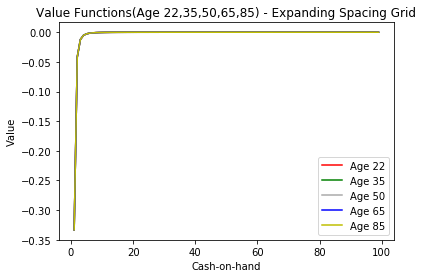

In [7]:
spline = CubicSpline(grid_w, v_df['22'], bc_type='natural')
v = spline(interp_points)
plt.plot(interp_points, v, color='r', label='Age 22')

spline = CubicSpline(grid_w, v_df['35'], bc_type='natural')
v = spline(interp_points)
plt.plot(interp_points, v, color='g', label='Age 35')

spline = CubicSpline(grid_w, v_df['50'], bc_type='natural')
v = spline(interp_points)
plt.plot(interp_points, v, color='darkgrey', label='Age 50')

spline = CubicSpline(grid_w, v_df['65'], bc_type='natural')
v = spline(interp_points)
plt.plot(interp_points, v, color='b', label='Age 65')

spline = CubicSpline(grid_w, v_df['85'], bc_type='natural')
v = spline(interp_points)
plt.plot(interp_points, v, color='y', label='Age 85')

plt.xlabel('Cash-on-hand')
plt.ylabel('Value')
plt.title('Value Functions(Age 22,35,50,65,85) - Expanding Spacing Grid')
plt.legend()
plt.show()


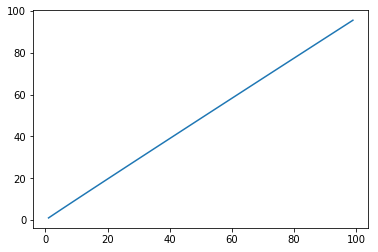

In [14]:
def utility(c, gamma):
    return c**(1-gamma) / (1-gamma)

gamma = 0.01
c = np.arange(1, 100).astype('float')

u = utility(c, gamma)

plt.plot(c, u)
plt.show()